# Final data description
## Population

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from dateutil import relativedelta

from sklearn.externals import joblib
%matplotlib inline 

In [2]:
events_type1 = joblib.load('pickles_ALL2/ALL_events1_moved.pickle')
print('Size of events type1: ',events_type1.size)
events_type2 = joblib.load('pickles_ALL2/ALL_events2_moved.pickle')
print('Size of events type2: ',events_type2.size)
pob = joblib.load('pickles_ALL2/ALL_pob_sex.pickle')
print('Size of population: ',pob['id'].size)
deaths = joblib.load('pickles_ALL2/DEF_deaths_moved.pickle')
print('Size of deaths: ',deaths['id'].size)

Size of events type1:  104474632
Size of events type2:  77041104
Size of population:  60170
Size of deaths:  8700


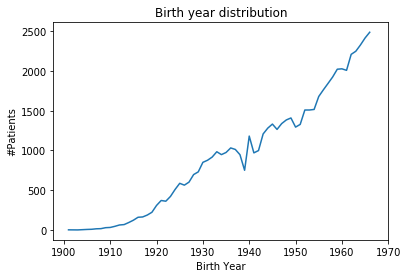

In [9]:
dat = pob.groupby(pob['dnaix']).size().to_frame('size')
xi = (np.arange(1900, 1980, step=10))
plt.title('Birth year distribution')
plt.plot(dat)
plt.xlabel('Birth Year')
plt.ylabel('#Patients')
plt.xticks(xi, xi)
plt.show()

In [10]:
dat = pob.groupby(pob['sexe']).size().to_frame('size')

In [11]:
round(dat['size']/(sum(dat['size']))*100,2)

sexe
0    50.38
1    49.62
Name: size, dtype: float64

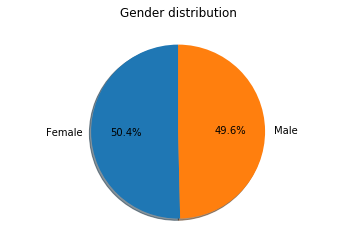

In [12]:
plt.title('Gender distribution')
plt.axis('equal')

plt.pie(round(dat['size']/(sum(dat['size']))*100,2), labels=('Female', 'Male'), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

         size
qmedea       
         6224
R         161
U1       8100
U2      10687
U3      11910
U4       7357
U5      15731


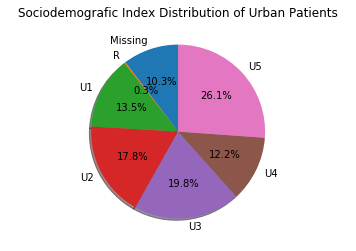

In [13]:
dat = pob.groupby(pob['qmedea']).size().to_frame('size')
print(dat)
plt.title('Sociodemografic Index Distribution of Urban Patients')
plt.axis('equal')

plt.pie(round(dat['size']/(sum(dat['size']))*100,2), labels=('Missing', 'R', 'U1', 'U2', 'U3','U4','U5'), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

## Events file

In [14]:
e1 = events_type1.groupby(events_type1['new_code'].str[:1]).size().to_frame('size')
e2 = events_type2.groupby(events_type2['new_code'].str[:1]).size().to_frame('size')

In [15]:
e1.reset_index(inplace = True)
e2.reset_index(inplace = True)

In [17]:
events_type = e1.append(e2)
display(events_type)

,new_code,size
0,a,265744
1,e,172650
2,f,10275921
3,l,7710721
4,m,4755191
5,v,2938431
0,b,130751
1,d,22819332
2,s,2730285


In [18]:
events_type.reset_index(inplace = True)

In [19]:
events_type.drop(['index'], axis = 1, inplace = True)

In [20]:
events_type

,new_code,size
0,a,265744
1,e,172650
2,f,10275921
3,l,7710721
4,m,4755191
5,v,2938431
6,b,130751
7,d,22819332
8,s,2730285


In [65]:
events_type['size'].sum()

51799026

In [22]:
del e1
del e2

In [25]:
events_type.reset_index(inplace=True)

In [26]:
names = events_type['new_code'].unique()
N = names.size
ind = np.arange(N)
print(names)

['a' 'e' 'f' 'l' 'm' 'v' 'b' 'd' 's']


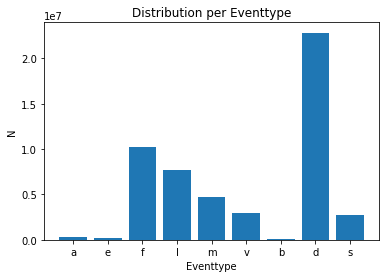

In [28]:
plt.title('Distribution per Eventtype')
plt.bar(ind, events_type['size'])
plt.xlabel('Eventtype')
plt.ylabel('N')
plt.xticks(ind, names)
plt.show()

In [17]:
e1_dat = events_type1.groupby(events_type1['dat'].dt.year).size().to_frame('size')
e2_dat = events_type2.groupby(events_type2['dat'].dt.year).size().to_frame('size')

In [18]:
e1_dat.reset_index(inplace = True)
e2_dat.reset_index(inplace = True)

In [19]:
events = e1_dat.merge(e2_dat, on = 'dat')

In [20]:
events['size'] = events['size_x'] + events['size_y']

In [21]:
display(events.head())

,dat,size_x,size_y,size
0,2006,1356186,226339,1582525
1,2007,2059521,612379,2671900
2,2008,2196492,958148,3154640
3,2009,2189709,1344959,3534668
4,2010,2342052,1795210,4137262


In [22]:
events.set_index(['dat'], inplace = True)

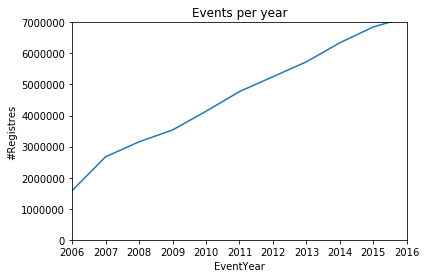

In [23]:
xi = (np.arange(2006, 2017, step=1))
plt.title('Events per year')
plt.plot(events['size'])
plt.axis([2006, 2016, 0, 7000000])
plt.xlabel('EventYear')
plt.ylabel('#Registres')
plt.xticks(xi, xi)
plt.show()

In [25]:
events['size']

dat
2006    1582525
2007    2671900
2008    3154640
2009    3534668
2010    4137262
2011    4771732
2012    5250610
2013    5729778
2014    6344795
2015    6853513
2016    7165590
2017     602013
Name: size, dtype: int64

# Cancers

In [13]:
m = events_type2['new_code'].str[:3] == 'd_C'
m2 = events_type2['new_code'].str[:5] == 'd_C44'

cancers = events_type2.loc[m&~m2].drop_duplicates(subset = 'id', keep = 'first')

In [14]:
cancers.head()

,dat,id,new_code
125285,2012-07-01,12156,d_C15.9
211129,2012-06-01,20246,d_C43.9
222047,2014-04-01,21574,d_C61
240455,2012-09-01,24186,d_C50.9
253336,2010-11-01,25377,d_C25.9


      size
dat       
2006   255
2007   320
2008   362
2009   391
2010   466
2011   540
2012   531
2013   569
2014   538
2015   497
2016   447
2017    14


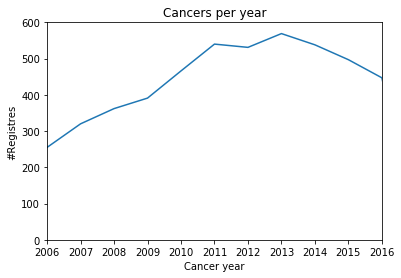

In [15]:
dat = cancers.groupby(cancers['dat'].dt.year).size().to_frame('size')
print(dat)
plt.title('Cancers per year')
xi = (np.arange(2006, 2017, step=1))
plt.plot(dat)
plt.axis([2006, 2016, 0, 600])
plt.xlabel('Cancer year')
plt.ylabel('#Registres')
plt.xticks(xi, xi)
plt.show()